In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from matplotlib.patches import FancyArrow, FancyArrowPatch
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.proj3d import proj_transform

In [38]:
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.sans-serif"] = "Computer Modern Sans serif"
plt.rcParams["font.monospace"] = "Computer Modern Typewriter"
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
# Optionally, add custom LaTeX preamble
plt.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{amsfonts} \usepackage{amssymb}"
)

# Choose a seaborn palette
palette = sns.color_palette("hsv", 7)  # has to specify number of lines

# Set the color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette)

# Set rcParams for tighter layout
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.constrained_layout.use"] = False
plt.rcParams["axes.linewidth"] = 1.2

# Set rcParams to show ticks on both left and right sides
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

plt.rcParams["legend.fontsize"] = 12
plt.rcParams["legend.title_fontsize"] = 14

plt.rcParams["axes.xmargin"] = 0.01


In [39]:
def plot_3d_double_arrow(ax, start, end, label, arrow_length=0.1):
    """
    Plots a two-headed arrow in a 3D plot with a label in the middle.

    Parameters:
    ax : matplotlib 3D axis
        The axis on which to plot.
    start : tuple (x, y, z)
        Starting point of the arrow.
    end : tuple (x, y, z)
        Ending point of the arrow.
    label : str
        Text to display at the middle of the arrow.
    arrow_length : float, optional
        Length of the arrowheads (default is 0.1).
    """
    start = np.array(start)
    end = np.array(end)
    mid = (start + end) / 2
    direction = end - start
    norm = np.linalg.norm(direction)
    if norm == 0:
        raise ValueError("Start and end points cannot be the same.")
    direction /= norm  # Normalize direction

    # Plot main line
    ax.plot(
        [start[0], end[0]], [start[1], end[1]], [start[2], end[2]], "k--", linewidth=1
    )

    # Compute arrowhead positions
    arrow1 = end - arrow_length * direction
    arrow2 = start + arrow_length * direction

    # Plot arrowheads
    ax.quiver(
        *arrow1,
        *direction,
        length=arrow_length,
        color="k",
        normalize=True,
    )
    ax.quiver(
        *arrow2,
        *-direction,
        length=arrow_length,
        color="k",
        normalize=True,
    )

    # Place text in the middle
    ax.text(
        mid[0] * 1.1,
        mid[1],
        mid[2],
        label,
        fontsize=30,
        color="black",
        ha="center",
        va="center",
    )


def draw_3d_arrow(
    ax, x, y, z, u, v, w, head_length=0.05, head_width=0.05, linewidth=1.0
):
    """
    Draws a 3D arrow with a full triangular head.

    Parameters:
    ax : matplotlib 3D axis
        The axis on which to draw the arrow.
    x, y, z : float
        Starting point of the arrow.
    u, v, w : float
        Directional components of the arrow.
    head_length : float, optional
        Length of the arrowhead.
    head_width : float, optional
        Width of the arrowhead.
    """
    # Compute the end of the arrow shaft
    shaft_x, shaft_y, shaft_z = (
        x + (1 - head_length) * u,
        y + (1 - head_length) * v,
        z + (1 - head_length) * w,
    )

    # Draw the shaft
    ax.quiver(
        x,
        y,
        z,
        shaft_x - x,
        shaft_y - y,
        shaft_z - z,
        color="k",
        arrow_length_ratio=0.0,
        linewidth=linewidth,
    )

    # Create the arrowhead base
    arrow_tip = np.array([x + u, y + v, z + w])

    # Perpendicular vectors for the arrowhead base (using Gram-Schmidt process)
    base_vec1 = np.cross([u, v, w], [1, 0, 0])
    if np.linalg.norm(base_vec1) < 1e-6:
        base_vec1 = np.cross([u, v, w], [0, 1, 0])
    base_vec1 = base_vec1 / np.linalg.norm(base_vec1) * head_width

    base_vec2 = np.cross([u, v, w], base_vec1)
    base_vec2 = base_vec2 / np.linalg.norm(base_vec2) * head_width

    # Arrowhead base points
    base1 = arrow_tip - head_length * np.array([u, v, w]) + base_vec1
    base2 = arrow_tip - head_length * np.array([u, v, w]) - base_vec1
    base3 = arrow_tip - head_length * np.array([u, v, w]) + base_vec2
    base4 = arrow_tip - head_length * np.array([u, v, w]) - base_vec2

    # Create triangular faces for the arrowhead
    faces = [
        [arrow_tip, base1, base3],
        [arrow_tip, base3, base2],
        [arrow_tip, base2, base4],
        [arrow_tip, base4, base1],
        [base1, base3, base2, base4],  # Base of the arrowhead
    ]

    # Plot the arrowhead
    arrowhead = Poly3DCollection(faces, color="k", alpha=0.7)
    ax.add_collection3d(arrowhead)

# 3D structure

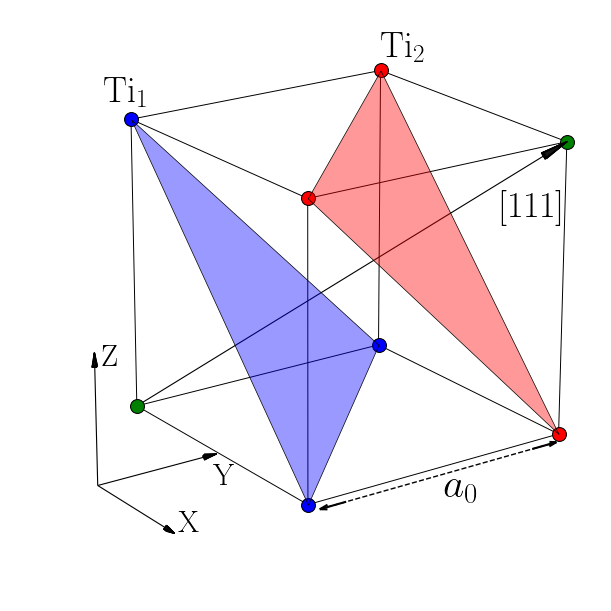

In [40]:
# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")

# Define the corners of the cubic structure
corners = np.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 1, 0],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
    ]
)
corners_1 = np.array([[0, 0, 0], [1, 1, 1]])
corners_2 = np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]])
corners_3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Nearest neighbor connections (pairs of indices)
connections = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 4),
    (1, 5),
    (2, 4),
    (2, 6),
    (3, 5),
    (3, 6),
    (4, 7),
    (5, 7),
    (6, 7),
]

connections_2 = [(0, 1), (0, 2), (1, 2)]

connections_3 = [(0, 1), (0, 2), (1, 2)]

# Plot atoms at the corners (dots)
ax.scatter(
    corners_1[:, 0],
    corners_1[:, 1],
    corners_1[:, 2],
    color="green",
    s=100,
    depthshade=False,
    edgecolors="black",
    linewidth=0.75,
    zorder=1,
)
ax.scatter(
    corners_2[:, 0],
    corners_2[:, 1],
    corners_2[:, 2],
    color="red",
    s=100,
    depthshade=False,
    edgecolors="black",
    linewidth=0.75,
    zorder=1,
)
ax.scatter(
    corners_3[:, 0],
    corners_3[:, 1],
    corners_3[:, 2],
    color="blue",
    s=100,
    depthshade=False,
    edgecolors="black",
    linewidth=0.75,
    zorder=1,
)

poly = Poly3DCollection(
    [corners_2], facecolor=(1, 0, 0, 0.4), edgecolor="k", linewidth=0.5
)
ax.add_collection3d(poly)
poly = Poly3DCollection(
    [corners_3], facecolor=(0, 0, 1, 0.4), edgecolor="k", linewidth=0.5
)
ax.add_collection3d(poly)

# Draw the lines connecting the corners of the cube
for i, j in connections:
    ax.plot(
        [corners[i, 0], corners[j, 0]],
        [corners[i, 1], corners[j, 1]],
        [corners[i, 2], corners[j, 2]],
        color="black",
        linewidth=0.7,
    )

ax.set_box_aspect([1, 1, 1])  # Equal scaling on all axes

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])


# Add axes in the left lower corner
draw_3d_arrow(
    ax, -0.1, -0.1, -0.3, 0.48, 0, 0, head_length=0.1, head_width=0.01, linewidth=0.8
)
draw_3d_arrow(
    ax, -0.1, -0.1, -0.3, 0, 0.48, 0, head_length=0.1, head_width=0.01, linewidth=0.8
)
draw_3d_arrow(
    ax, -0.1, -0.1, -0.3, 0, 0, 0.48, head_length=0.1, head_width=0.01, linewidth=0.8
)
draw_3d_arrow(ax, 0, 0, 0, 1, 1, 1, head_length=0.05, head_width=0.015, linewidth=0.8)

plot_3d_double_arrow(ax, (1.05, 0.01, 0), (1.05, 0.95, 0), r"$a_0$")


ax.text(0.95, 0.78, 0.78, r"$[111]$", fontsize=26)
ax.set_xlim([-0.15, 1])  # Set x-axis range
ax.set_ylim([-0.15, 1])  # Set y-axis range
ax.set_zlim([-0.15, 1])  # Set z-axis range

# Label axes
ax.text(0.75, -0.32, -0.1, "X", color="black", fontsize=22)
ax.text(-0.08, 0.35, -0.4, "Y", color="black", fontsize=22)
ax.text(-0.1, -0.07, 0.13, "Z", color="black", fontsize=22)

# Sublattices
ax.text(0, -0.1, 1.08, r"$\text{Ti}_1$", color="black", fontsize=26)
ax.text(0, 1, 1.05, r"$\text{Ti}_2$", color="black", fontsize=26)

ax.view_init(elev=20, azim=-35)
# Hide the 3D axis lines
ax.set_axis_off()

# Show the plot
plt.show()

#plt.savefig("cubic_structure.png")

# 2D plot of hexagonal lattice

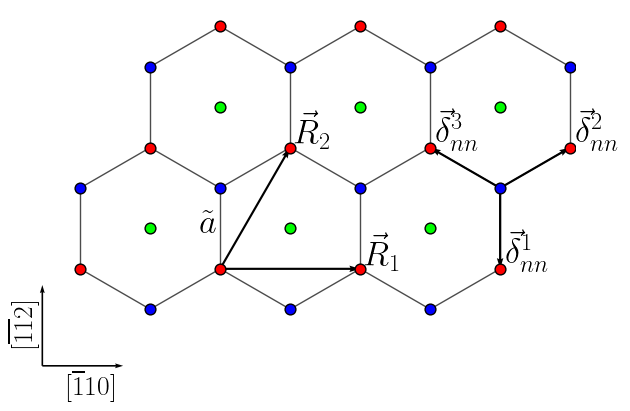

In [41]:
def connect_neighbors(points, ax, max_distance=1.1):
    """Draw lines between nearest neighbors."""
    for i in range(len(points)):
        for j in range(i + 1, len(points)):  # Avoid duplicate pairs
            dist = np.linalg.norm(points[i] - points[j])
            if dist < max_distance:  # Connect only close neighbors
                ax.plot(
                    [points[i][0], points[j][0]],
                    [points[i][1], points[j][1]],
                    "k-",
                    lw=1,
                    alpha=0.7,
                )


# Define hexagonal lattice basis vectors
a1 = np.array([np.sqrt(3), 0])  # First basis vector
a2 = np.array([np.sqrt(3) / 2, 3.0 / 2])  # Second basis vector


delta_offset = 2 * a1
d1 = np.array([0, -1])
d2 = np.array([np.sqrt(3) / 2, 1.0 / 2])
d3 = np.array([-np.sqrt(3) / 2, 1.0 / 2])

second_lattice_offset = np.array([0, -1])
third_lattice_offset = np.array([np.sqrt(3)/2, -0.5])

origin = np.array([0, 0])
# Generate lattice points
N = 3  # Number of points in each direction
lattice_points = []
lattice_2_points = []
lattice_3_points = []

for i in range(-1, N):
    for j in range(-1, N - 1):
        if i == -1 and j == -1:
            continue

        point = i * a1 + j * a2
        lattice_points.append(point)

for i in range(-1, N):
    for j in range(0, N):
        if i == N - 1 and j == N - 1:
            continue
        point = i * a1 + j * a2
        lattice_2_points.append(point + second_lattice_offset)


for i in range(-1, N - 1):
    for j in range(0, N - 1):
        if i == N - 1 and j == N - 1:
            continue
        point = i * a1 + j * a2
        lattice_3_points.append(point + third_lattice_offset)

lattice_points = np.array(lattice_points)
lattice_2_points = np.array(lattice_2_points)
lattice_3_points = np.array(lattice_3_points)

fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)

# Combine both lattices for neighbor search
all_points = np.vstack([lattice_points, lattice_2_points])

# Connect nearest neighbors
connect_neighbors(all_points, ax)
# Plot the lattice
ax.scatter(
    lattice_points[:, 0],
    lattice_points[:, 1],
    s=60,
    color="b",
    alpha=1.0,
    zorder=2,
    edgecolor="k",
)
ax.scatter(
    lattice_2_points[:, 0],
    lattice_2_points[:, 1],
    s=60,
    color="r",
    alpha=1.0,
    zorder=2,
    edgecolor="k",
)
ax.scatter(
    lattice_3_points[:, 0],
    lattice_3_points[:, 1],
    s=60,
    color="lime",
    alpha=1.0,
    zorder=2,
    edgecolor="k",
)

# Plotting unit vectors
ax.quiver(
    *second_lattice_offset,
    *a1,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.004,
)
ax.quiver(
    *second_lattice_offset,
    *a2,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.004,
)

#Plotting d_nn vectors
ax.quiver(
    *delta_offset,
    *d1,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.004,
)
ax.quiver(
    *delta_offset,
    *d2,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.004,
)
ax.quiver(
    *delta_offset,
    *d3,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.004,
)


a1_title = a1 + second_lattice_offset + np.array([0.05, 0.05])
a2_title = a2 + second_lattice_offset + np.array([0.05, 0.05])
# Labeling unit vectors
ax.text(*a1_title, r"$\vec{R}_1$", color="black", fontsize=25)
ax.text(*a2_title, r"$\vec{R}_2$", color="black", fontsize=25)

d1_title = d1 + delta_offset + np.array([0.07, 0.07])
d2_title = d2 + delta_offset + np.array([0.07, 0.07])
d3_title = d3 + delta_offset + np.array([0.07, 0.07])
# Labeling unit vectors
ax.text(*d1_title, r"$\vec{\delta}_{nn}^{1}$", color="black", fontsize=25)
ax.text(*d2_title, r"$\vec{\delta}_{nn}^{2}$", color="black", fontsize=25)
ax.text(*d3_title, r"$\vec{\delta}_{nn}^{3}$", color="black", fontsize=25)

# Add a tilde marking on plot
a_tilde_placement = second_lattice_offset + np.array([-0.25, 0.45])
ax.text(*a_tilde_placement, r"$\tilde{a}$", color="black", fontsize=25)


xy_origin = np.array([-2.2, -2.2])
X = np.array([1, 0])
Y = np.array([0, 1])
x_title = xy_origin + 0.3 * X + np.array([0, -0.35])
y_title = xy_origin + 0.3 * Y + np.array([-0.4, 0])
# Plotting reference to X,Y plane
ax.quiver(
    *xy_origin,
    *X,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.003,
)
ax.quiver(
    *xy_origin,
    *Y,
    color="black",
    angles="xy",
    scale_units="xy",
    scale=1,
    width=0.003,
)
ax.text(*x_title, r"$[\overline{1}10]$", color="black", fontsize=20)
ax.text(
    *y_title,
    r"$[\overline{1} \overline{1} 2]$",
    color="black",
    fontsize=20,
    rotation=90,
)

ax.set_axis_off()
ax.set_aspect("equal")
plt.show()
#plt.savefig("hexagonal_lattice.png")